https://fenics-handson.readthedocs.io/en/latest/navierstokes/doc.html

Plotting Mesh


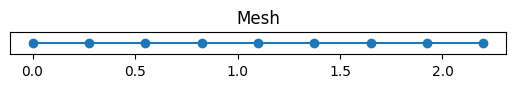

In [1]:
from dolfin import *
import matplotlib.pyplot as plt

# Create mesh and define function space
L = 2.2
W = 0.41
n_x = 8
n_y = 8
N_bulk = n_x * n_y

# Define initial conditions
U = 0.3
# u_in = Expression(("4.0*U*x[1]*(0.41 - x[1])/(0.41*0.41)", "0.0"),
#                   degree=2, U=U)

u_in = Constant(U)
nu = Constant(0.001)

# Define mesh
# mesh = RectangleMesh(Point(0,0), Point(L, W), n_x, n_y, "right/left")

l_fenics = Constant(L)
mesh = IntervalMesh(n_x, 0, l_fenics)
print("Plotting Mesh")
plot(mesh, title="Mesh")



In [2]:

# Construct facet markers
# bndry = MeshFunction("size_t", mesh, mesh.topology().dim()-1)
# for f in facets(mesh):
#     mp = f.midpoint()
#     if near(mp[0], 0.0):  # inflow
#         bndry[f] = 1
#     elif near(mp[0], L):  # outflow
#         bndry[f] = 2
#     elif near(mp[1], 0.0) or near(mp[1], W):  # walls
#         bndry[f] = 3

# # Dump facet markers to file to plot in Paraview
# with XDMFFile('facets.xdmf') as f:
#     f.write(bndry)



In [3]:
# Build function spaces (Taylor-Hood)
P2 = VectorElement("P", mesh.ufl_cell(), 2)
P1 = FiniteElement("P", mesh.ufl_cell(), 1)
TH = MixedElement([P2, P1])
W = FunctionSpace(mesh, TH)

In [4]:
w = Function (W)
u, p = split(w)
v, q = TestFunctions(W)

In [7]:
# Inflow Dirichlet boundary condition
def boundary(x):
    return x[0] < DOLFIN_EPS

variable1_dirichlet = Expression('reference1 + 0*x[0]', degree = 2, reference1 = Constant(U), domain = mesh)

In [8]:

# # Prepare Dirichlet boundary conditions
# bc_walls = DirichletBC(W.sub(0), (0, 0), bndry, 3)
# bc_in = DirichletBC(W.sub(0), u_in, bndry, 1)
# bcs = [bc_walls, bc_in]

def Inflow (x, on_boundary): 
    return (x[0] < DOLFIN_EPS) and on_boundary

# Define boundary condition
bc = DirichletBC(W.sub(0), variable1_dirichlet, Inflow)

# bc1 = DirichletBC (W.sub(0), u_in, Inflow)




RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to create Dirichlet boundary condition.
*** Reason:  Expecting a vector-valued boundary value but given function is scalar.
*** Where:   This error was encountered inside DirichletBC.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------


In [4]:
# Build function spaces (Taylor-Hood)
P2 = VectorElement("P", mesh.ufl_cell(), 2)
P1 = FiniteElement("P", mesh.ufl_cell(), 1)
TH = MixedElement([P2, P1])
W = FunctionSpace(mesh, TH)

# # Define trial and test functions
# u, p = TrialFunctions(W)
# v, q = TestFunctions(W)

PLOT STEADY NAVIER STOKES

In [7]:
# Define variational problem


F = nu*inner(grad(u), grad(v))*dx + dot(dot(grad(u), u), v)*dx \
    - p*div(v)*dx - q*div(u)*dx

# Compute directional derivative about u in the direction of du (Jacobian)
J = derivative(F, w)


In [8]:
# Create solver
problem = NonlinearVariationalProblem(F, w, bcs, J)

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to define nonlinear variational problem F(u; v) = 0 for all v.
*** Reason:  Expecting the boundary conditions to to live on (a subspace of) the trial space.
*** Where:   This error was encountered inside NonlinearVariationalProblem.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------


In [9]:
# Define transient solver function

problem = NonlinearVariationalProblem (F, w, bcs = bcs, J = dF)#, form_compiler_parameters = form_compiler_parameters_input)

transientsolver = NonlinearVariationalSolver (problem)

transientsolver = solver_linear (F, w, bcs, dF)
transientsolver.solve ()

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to define nonlinear variational problem F(u; v) = 0 for all v.
*** Reason:  Expecting the boundary conditions to to live on (a subspace of) the trial space.
*** Where:   This error was encountered inside NonlinearVariationalProblem.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------


In [ ]:


# Split of the vector var
(variable1, variable2, variable3, variable4) = variable.split (deepcopy = True)

problem = NonlinearVariationalProblem (R_input, variable_input, bcs = bcs_input, J = dF_input)#, form_compiler_parameters = form_compiler_parameters_input)

transientsolver = NonlinearVariationalSolver (problem)


In [ ]:
# Save solution in VTK format
file = File("poisson.pvd")
file << u

# Plot solution
plot(u)
plt.show()